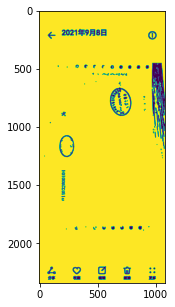

In [130]:
import cv2 as cv
import numpy as np
import sys
np.set_printoptions(linewidth=300)
import matplotlib.pyplot as plt
img_file=r'D:\1.jpg'
img=cv.imdecode(np.fromfile(img_file,np.uint8),1)
imggray=img[:,:,1]#cv.cvtColor(img,cv.COLOR_BGR2GRAY)
#imggray=cv.GaussianBlur(imggray,(3,3),1)
kernal=np.ones((5,5),np.uint8)
erode=cv.erode(imggray,kernal,3)
#dilate=cv.dilate(erode,kernal,1)
ret,thresh=cv.threshold(erode,60,255,cv.THRESH_BINARY)

mask = cv.inRange(thresh, 1, 255)
thresh_1 = cv.bitwise_and(thresh,thresh, mask= mask)

thresh_2=cv.bitwise_not(thresh_1)
floodFill=cv.floodFill(thresh_2,None,(0,0),255)

erode=cv.erode(floodFill[1],kernal,8)
#cv.getStructuringElement()
#dp累加器和原图之间分辨率的反比，一般取1，如果要检测非常小的圆形，可设大一点
#mindist两个圆心之间最小的距离
#param1边缘检测较大的阈值
#param2累加器圆心阈值，越小，则越容易触发错误的圆圈。也可以理解为圆形边界在该圆心的映射值
# circles  =  cv.HoughCircles(thresh,cv.HOUGH_GRADIENT,dp=1,mindist=100,param1=50,param2=30,minRadius=10,maxRadius=80)
# for i in circles[0,:]:
#     cv.circle(img,(i[0],i[1]),int(i[2]),(0,255,0),2)
#     cv.circle(img,(i[0],i[1]),2,(0,0,255),3)
plt.figure(figsize=(5,5))
plt.imshow(erode)
plt.show()


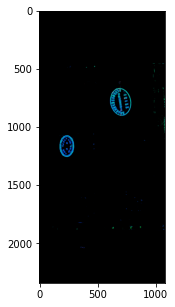

In [3]:
#提取红色像素
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img_file=r'D:\1.jpg'
img=cv.imdecode(np.fromfile(img_file,np.uint8),1)
img_hsv=cv.cvtColor(img,cv.COLOR_BGR2HSV)
#lower mask(0-10)
lower_red=np.array([0,50,50])
upper_red=np.array([10,255,255])
mask0=cv.inRange(img_hsv,lower_red,upper_red)  #inrange作用：img_hsv在给定两个阈值之间则转为255，否则转为0。用以图像颜色识别。

#upper mask(170-180)
lower_red=np.array([170,50,50])
upper_red=np.array([180,255,255])
mask1=cv.inRange(img_hsv,lower_red,upper_red)

#join mask
mask=mask0+mask1

#set my output img to zero everywhere except my mask

output_img=img.copy()
output_img[np.where(mask==0)]=0

# or HSV image
output_hsv=img_hsv.copy()
output_hsv[np.where(mask==0)]=0
plt.figure(figsize=(5,5))
plt.imshow(output_hsv)
plt.show()


In [8]:
#查找绿色
import numpy as np
green=np.uint8([[[118,189,255]]]) #定义绿色
green=cv.cvtColor(green,cv.COLOR_BGR2HSV) #转为HSV通道的绿色
print(green)

[[[ 16 137 255]]]


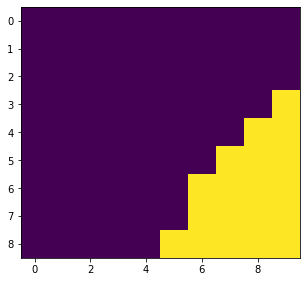

In [20]:
img1=img_hsv[685:694,627:637]
lower_red=np.array([0,50,50])
upper_red=np.array([10,255,255])
mask0=cv.inRange(img1,lower_red,upper_red) 
lower_red=np.array([170,50,50])
upper_red=np.array([180,255,255])
mask1=cv.inRange(img1,lower_red,upper_red)
mask=mask0+mask1
plt.figure(figsize=(5,5))
plt.imshow(mask)
plt.show()


In [27]:
img1.shape
img1[:,:,1]

array([[ 64,  64,  65,  68,  69,  69,  69,  67,  67,  70],
       [ 65,  64,  65,  68,  69,  70,  70,  67,  67,  71],
       [ 64,  64,  64,  68,  68,  70,  74,  70,  71,  77],
       [ 64,  64,  64,  68,  68,  73,  76,  75,  79,  88],
       [ 64,  64,  64,  66,  71,  70,  79,  82,  90, 109],
       [ 64,  64,  64,  65,  70,  70,  77,  92, 111, 145],
       [ 64,  64,  63,  64,  69,  74,  86, 110, 147, 180],
       [ 64,  64,  62,  64,  70,  80, 103, 144, 182, 195],
       [ 64,  64,  64,  64,  74,  88, 125, 176, 200, 203]], dtype=uint8)

In [30]:
sobel=cv.Sobel(img1,cv.CV_64F,1,0,ksize=3)
sobel[:,:,1]

array([[  0.,   2.,  16.,  16.,   6.,   2., -10., -10.,  14.,   0.],
       [  0.,   1.,  16.,  16.,   7.,   8.,  -8., -11.,  18.,   0.],
       [  0.,   0.,  16.,  16.,  11.,  21.,  -1.,  -6.,  31.,   0.],
       [  0.,   0.,  14.,  19.,  16.,  30.,  16.,  14.,  60.,   0.],
       [  0.,   0.,   9.,  24.,  18.,  31.,  48.,  59., 120.,   0.],
       [  0.,  -1.,   4.,  25.,  24.,  39.,  92., 140., 203.,   0.],
       [  0.,  -4.,   1.,  26.,  41.,  74., 158., 235., 244.,   0.],
       [  0.,  -5.,   0.,  32.,  66., 134., 252., 294., 199.,   0.],
       [  0.,  -4.,   0.,  36.,  80., 168., 304., 308., 156.,   0.]])

In [1]:
img1=cv.imread(r'D:\img\1.png')
img2=cv.imread(r'D:\img\2.png')
row,col=img1.shape[:2]
img2_1=cv.resize(img2,(col,row))


NameError: name 'cv' is not defined

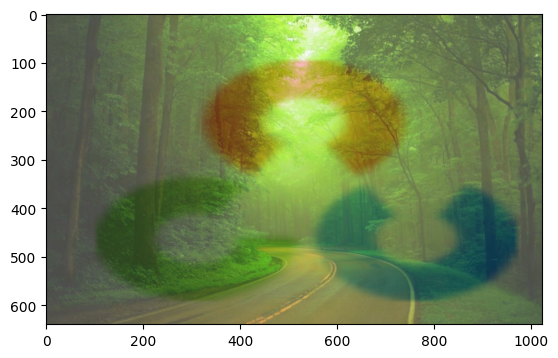

In [230]:
dst=cv.addWeighted(img1,0.7,img2_1,0.3,0)
plt.imshow(dst[:,:,::-1])
plt.show()

(80, 79, 3) (80, 79)


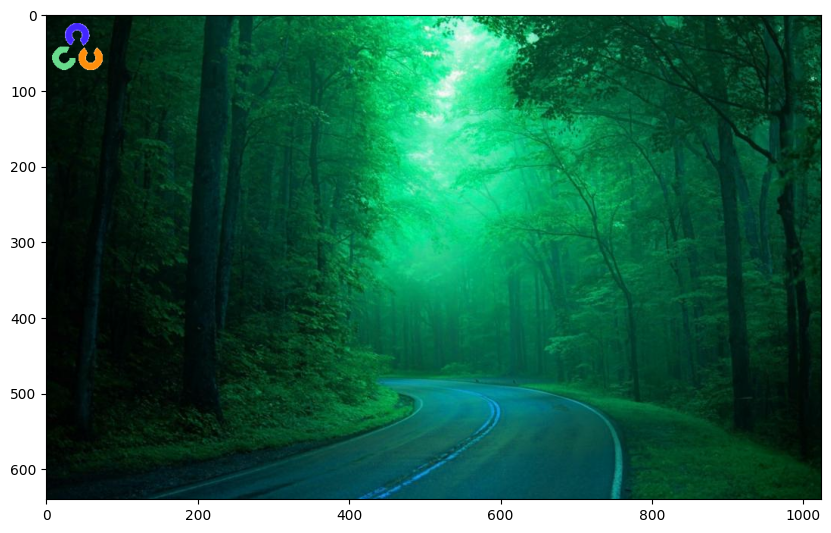

In [88]:
img1=cv.imread(r'D:\img\1.png')
img2=cv.imread(r'D:\img\2.png')
row,col=img1.shape[:2]
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols]
# Now create a mask of logo and create its inverse mask also
img2gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(img2gray, 200, 255, cv.THRESH_BINARY_INV)
mask_inv = cv.bitwise_not(mask)
# Now black-out the area of logo in ROI
img1_bg = cv.bitwise_and(roi,roi,mask = mask_inv)
# Take only region of logo from logo image.
img2_fg = cv.bitwise_and(img2,img2,mask = mask)
# Put logo in ROI and modify the main image
dst = cv.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
plt.figure(figsize=(10,10))
plt.imshow(img1)
plt.show()

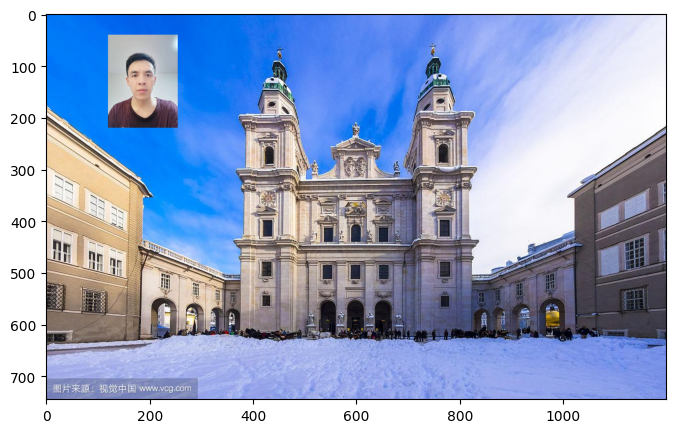

In [3]:
img1=cv.imread(r'D:\img\7.png')
img2=cv.imread(r'D:\img\jonas.jpg')
col,row,_=img2.shape
row,col=int(row/8),int(col/8)
img2=cv.resize(img2,(row,col))
roi = img1[0:col, 0:row]
img2gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(img2gray, 255, 255, cv.THRESH_BINARY_INV)
mask_inv = cv.bitwise_not(mask)
img1_bg = cv.bitwise_and(roi,roi,mask = mask_inv)
img2_fg = cv.bitwise_and(img2,img2,mask = mask)
dst = cv.add(img1_bg,img2_fg)


img1[40:40+col, 120:120+row ] = dst
plt.figure(figsize=(8,8))
plt.imshow(img1[:,:,::-1])
plt.show()

In [114]:
dst.shape

(220, 134, 3)

In [4]:
print(mask.shape)
print(roi.shape)

(180, 135)
(180, 135, 3)


In [5]:
rain=cv.imread(r'D:\img\t.png')
jonas1=cv.cvtColor(jonas,cv.COLOR_BGR2GRAY)
#jonas1=jonas[:,:,1]
imggray=cv.GaussianBlur(jonas1,(3,3),1)

kernel = np.ones((3,3),np.uint8)

erosion = cv.dilate(imggray,kernel,iterations = 10)
erosion = cv.erode(erosion,kernel,iterations = 10)

#ret,threshold=cv.threshold(erosion,200,255,cv.THRESH_BINARY)
cany=cv.Canny(erosion,0,5)

thresh_fill=cv.floodFill(cany,None,(0,0),255)


plt.figure(figsize=(8,8))
plt.imshow(jonas)
plt.show()

NameError: name 'jonas' is not defined

In [314]:
erosion.shape

(1763, 1079)

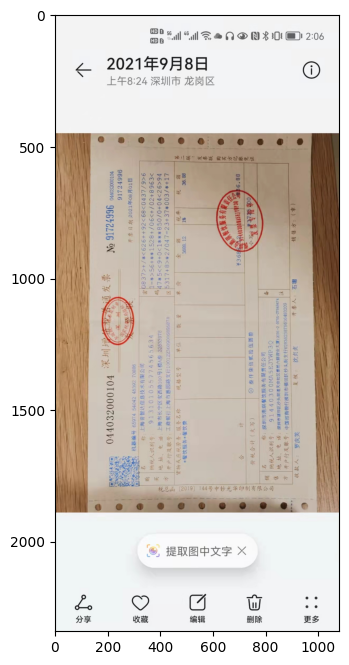

In [16]:
jonas=cv.imread(r'D:\img\2.jpg')
low_value=10
max_value=150
#jonasgray = cv.cvtColor(jonas,cv.COLOR_BGR2GRAY)
blur=cv.GaussianBlur(jonas,(5,5),0.5)
canny=cv.Canny(blur,low_value,max_value,)
plt.figure(figsize=(8,8))
plt.imshow(jonas[:,:,::-1])
plt.show()

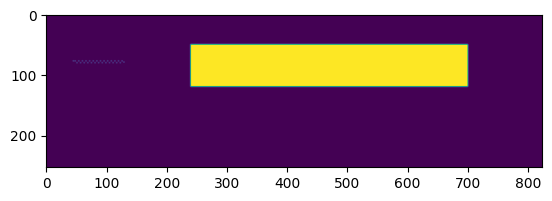

In [10]:

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r'D:\img\t.png')
img=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img2=np.where((img>254)|(img<240),0,img)

imggray=cv.GaussianBlur(img2,(3,3),1)
#ret,thresh=cv.threshold(img,254,0,cv.THRESH_TOZERO)

#erosion = cv.dilate(erosion,kernel,iterations = 5)
#mask = cv.erode(erosion,kernel,iterations = 2)
#row,col=img1.shape[:2]
#roi=img1[:int(r/8),:int(c/8)]
#img1_bg=cv.bitwise_and(roi,roi,mask=mask)
#canny=cv.Canny(img,200,255)


plt.imshow(imggray)
plt.show()


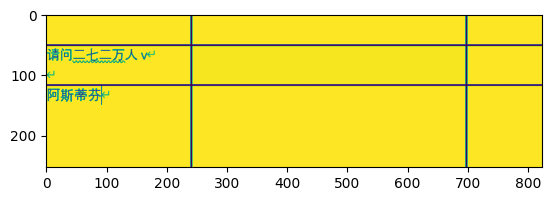

In [59]:

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r'D:\img\t.png')
img=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img2=np.where((img>254)|(img<240),0,img)
kernel = np.ones((5,5),np.uint8)
dilation = cv.dilate(img,kernel,iterations = 1)

#imggray=cv.GaussianBlur(img2,(3,3),1)
#ret,thresh=cv.threshold(img,254,0,cv.THRESH_TOZERO)

#erosion = cv.dilate(erosion,kernel,iterations = 5)
#mask = cv.erode(erosion,kernel,iterations = 2)
#row,col=img1.shape[:2]
#roi=img1[:int(r/8),:int(c/8)]
#img1_bg=cv.bitwise_and(roi,roi,mask=mask)
canny=cv.Canny(dilation,0,10,(0,255,0))
lines = cv.HoughLines(canny,1,np.pi/180,60) #最后一个参数指定线的长度
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv.line(img,(x1,y1),(x2,y2),(0,0,255),2)
plt.imshow(img)
plt.show()


In [57]:
lines

array([[[117.       ,   1.5707964]],

       [[ 51.       ,   1.5707964]],

       [[698.       ,   0.       ]],

       [[241.       ,   0.       ]]], dtype=float32)

In [ ]:
#调用摄像头，进行红色物体跟踪

In [ ]:
import cv2 as cv
import numpy as np
cap=cv.VideoCapture(0)

while True:
    _,frame=cap.read()
    
    hsv_frame=cv.cvtColor(frame,cv.COLOR_BGR2HSV)

    lower_red=np.array([0,100,10 0])
    upper_red=np.array([10,255,255])
    mask0=cv.inRange(hsv_frame,lower_red,upper_red)

    lower_red=np.array([165,165,84])
    upper_red=np.array([180,255,255])
    mask1=cv.inRange(hsv_frame,lower_red,upper_red)
    mask=mask0+mask1
    
    cv.imshow('Frame',frame)
    cv.imshow('Red mask',mask1)
    key=cv.waitKey(1)
    if key==27:
        break



In [6]:
from __future__ import print_function
import cv2 as cv
import argparse
parser = argparse.ArgumentParser(description='This program shows how to use background subtraction methods provided by \
                                              OpenCV. You can process both videos and images.')
parser.add_argument('--input', type=str, help='Path to a video or a sequence of image.', default='vtest.avi')
parser.add_argument('--algo', type=str, help='Background subtraction method (KNN, MOG2).', default='MOG2')
args = parser.parse_args()
if args.algo == 'MOG2':
    backSub = cv.createBackgroundSubtractorMOG2()
else:
    backSub = cv.createBackgroundSubtractorKNN()
capture = cv.VideoCapture(cv.samples.findFileOrKeep(args.input))
if not capture.isOpened:
    print('Unable to open: ' + args.input)
    exit(0)
while True:
    ret, frame = capture.read()
    if frame is None:
        break
    
    fgMask = backSub.apply(frame)
    
    
    cv.rectangle(frame, (10, 2), (100,20), (255,255,255), -1)
    cv.putText(frame, str(capture.get(cv.CAP_PROP_POS_FRAMES)), (15, 15),
               cv.FONT_HERSHEY_SIMPLEX, 0.5 , (0,0,0))
    
    
    cv.imshow('Frame', frame)
    cv.imshow('FG Mask', fgMask)
    
    keyboard = cv.waitKey(30)
    if keyboard == 'q' or keyboard == 27:
        break


usage: ipykernel_launcher.py [-h] [--input INPUT] [--algo ALGO]
ipykernel_launcher.py: error: unrecognized arguments: -f C:\Users\jonas\AppData\Roaming\jupyter\runtime\kernel-3bb0fd70-83a6-48db-aeca-971bf3ac0c9b.json


SystemExit: 2

In [10]:
parser=argparse.ArgumentParser()
parser.add_argument('echo')
args=parser.parse_args()
print(args)

usage: ipykernel_launcher.py [-h] echo
ipykernel_launcher.py: error: unrecognized arguments: -f


SystemExit: 2

c:\python39\lib\site-packages\IPython\core\interactiveshell.py:3449: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [59]:
import pandas as pd
a=pd.DataFrame({'A':['a','b','c','d'],'B':[2,4,6,8]})
b=pd.DataFrame({'A':['a','b','b','d'],'C':[1,3,5,7]})
c=pd.DataFrame({'A':['a','b','b','b'],'D':[1,7,8,9]})
a=pd.merge(a,b,on='A',how='left')
a,c

(   A  B    C
 0  a  2  1.0
 1  b  4  3.0
 2  b  4  5.0
 3  c  6  NaN
 4  d  8  7.0,
    A  D
 0  a  1
 1  b  7
 2  b  8
 3  b  9)

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
file1=r'D:\python\opencv练习\img\map3.png'
file2=r'D:\python\opencv练习\img\5.png'
img1=cv.imdecode(np.fromfile(file1,np.uint8),cv.IMREAD_ANYCOLOR)
img2=cv.imdecode(np.fromfile(file2,np.uint8),cv.IMREAD_ANYCOLOR)
img1=cv.resize(img1,(300,300))
img2=cv.resize(img2,(300,300))
x1,y1,z1=np.linalg.svd(img1[:,:,1])
x2,y2,z2=np.linalg.svd(img2[:,:,1])
print(y1[:10])
print(y2[:10])

[70002.05465125  1468.50433961  1313.22110592  1287.04260948
  1174.80216121  1146.2428759   1119.52521088  1035.91055722
   995.69656027   921.79937125]
[70105.03399934  1446.88286492  1299.3655741   1208.89570453
  1187.84595909  1129.1735286   1070.95420548   973.74719991
   939.43311001   937.68188016]


In [34]:
y1[200:210]

array([56.21562109, 56.07680428, 55.33811041, 54.28671023, 53.67453694,
       52.53008365, 51.58809834, 51.15733706, 50.07620118, 49.71306996])

In [33]:
y2[200:210]

array([44.59026766, 44.11568791, 42.92066604, 42.38708269, 41.90067575,
       39.89243842, 39.7403261 , 39.69518475, 38.44840754, 38.17031733])

In [32]:
print(x1.shape,x2.shape)
print(z1.shape,z2.shape)

(300, 300) (300, 300)
(300, 300) (300, 300)


In [57]:
lx=[]
for x in y1[:50]:
    lx.append(round(y))

In [56]:
ly=[]
for x in y2[:50]:
    ly.append(round(y,5))

In [45]:
for j,k in zip(lx,ly):
    print(j,k)

-0.05739 -0.05735
-0.0181 -0.02551
-0.04398 -0.02519
-0.00297 -0.0265
0.00405 -0.021
-0.01846 0.01468
-0.00941 -0.01084
0.01349 -0.01119
-0.02757 0.02448
0.00316 0.02708
0.02177 -0.02473
-0.02884 -0.04628
0.00076 0.037
0.05053 -0.01554
0.00742 -0.01921
-0.02896 0.01991
0.00135 0.02376
0.01823 -0.01817
0.00679 0.03856
-0.01613 0.05641
0.00632 -0.03572
0.0083 0.00207
-0.03283 0.00712
0.00815 -0.01918
0.03161 -0.01927
-0.05103 0.02712
0.02102 0.00585
-0.01347 -0.00099
0.03336 0.00686
0.0128 0.04358
-0.03611 0.00172
0.02803 0.02172
-0.01194 -0.01037
-0.04056 0.03281
0.02825 0.02901
-0.00781 -0.03673
0.00161 -0.02057
0.00581 -0.01978
0.01472 -0.01597
-0.00855 -0.01307
0.04102 0.00541
-0.0545 0.01423
-0.01843 0.08097
-0.03885 -0.01376
-0.0434 0.02638
0.02073 0.01678
0.01449 0.03922
-0.05135 -0.07597
0.04074 -0.03279
-0.01288 -0.044
0.03029 0.04476
0.047 0.01416
0.04552 0.02851
0.01608 0.02943
0.01192 -0.02183
-0.01436 0.02729
0.00594 0.02372
0.02722 -0.03473
0.04853 -0.00609
0.02088 0.03975


In [62]:
np.corrcoef(y1[:50],y2[:50])

array([[1.        , 0.99999812],
       [0.99999812, 1.        ]])

In [61]:
y1[:50]

array([70002.05465125,  1468.50433961,  1313.22110592,  1287.04260948,
        1174.80216121,  1146.2428759 ,  1119.52521088,  1035.91055722,
         995.69656027,   921.79937125,   877.44500328,   809.17938849,
         770.27323207,   752.1961076 ,   728.19707872,   693.02478701,
         667.99742351,   657.40306902,   639.70113013,   601.54550029,
         587.6247295 ,   576.27192775,   563.35697966,   559.8091046 ,
         547.17713375,   543.38662841,   524.51852461,   491.58118057,
         490.62786554,   477.26855664,   464.43267689,   451.84050902,
         445.19085926,   444.22863842,   437.33250835,   430.96060107,
         420.14597721,   413.2825648 ,   398.91815784,   398.62444816,
         393.28279705,   391.61551719,   387.80700725,   373.54809337,
         365.53609685,   362.51810018,   358.56134218,   354.14975787,
         347.45127251,   340.12721285])

In [4]:
t1=cv.cornerEigenValsAndVecs(img1[:,:,1],3,3,0.5)
t2=cv.cornerEigenValsAndVecs(img2[:,:,1],3,3,0.5)

In [29]:
cv.cornerHarris(img1[:10,:10,0],5,5,0.6)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [129]:
#filter2d并非时真正的卷积，而是执行的from scipy.ndimage import correlate  中的correlate计算
#如果要执行真正的卷积聚散，需要先对b进行转置，可用函数cv.flip(b,-1)
a=np.uint8([[1,3,5,1],[2,3,4,2],[4,5,6,3],[2,4,8,4]])
print(a)
b=np.uint8([[0,0,0],[0,5,2],[0,0,0]])
print(b)
print(cv.filter2D(a,-1,b))  


[[1 3 5 1]
 [2 3 4 2]
 [4 5 6 3]
 [2 4 8 4]]
[[0 0 0]
 [0 5 2]
 [0 0 0]]
[[11 25 27 15]
 [16 23 24 18]
 [30 37 36 27]
 [18 36 48 36]]
